<a href="https://colab.research.google.com/github/reshma-03/IISc-Projects/blob/main/WorkingCopy_of_M3_NB_MiniProject_5_Customer_Segmentation_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Customer segmentation using clustering

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique

## Grading = 10 Points

### Import Required packages

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy import stats

## Data Wrangling

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

## Load the data

In [ ]:
# YOUR CODE HERE
df = pd.read_csv("Online_Retail_Train.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


In [ ]:
df.shape

(514813, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514813 entries, 0 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    514813 non-null  object 
 1   StockCode    514813 non-null  object 
 2   Description  513428 non-null  object 
 3   Quantity     514813 non-null  int64  
 4   InvoiceDate  514813 non-null  object 
 5   UnitPrice    514813 non-null  float64
 6   CustomerID   386550 non-null  float64
 7   Country      514813 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ MB


## Data Pre-processing (2 points)

Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://thecleverprogrammer.com/2023/07/26/detect-and-remove-outliers-using-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [ ]:
# YOUR CODE HERE

def remove_duplicates(df):
    print('-------------------------------Removing duplicate entries in dataset--------------------------------')
    print('Duplicate entries in dataset :',len(df[df.duplicated()]))
    df_modified = df.drop_duplicates()
    print('Duplicate entries in dataset after removing :',len(df_modified[df_modified.duplicated()]))
    print('Shape of dataset :', df_modified.shape)
    return df_modified

def remove_cancelled_orders(df):
    print('-------------------------------Removing cancelled orders in dataset--------------------------------')
    cancelled_orders = df[df.InvoiceNo.str.startswith('C', na=False)]
    adjusted_orders = df[df.InvoiceNo.str.startswith('A', na=False)]
    print('Cancelled orders in dataset :',len(cancelled_orders))
    print('Adjusted orders in dataset :',len(adjusted_orders))
    df = df[~df["InvoiceNo"].str.startswith(('C', 'A'))]
    print('Shape of dataset after removing cancelled and adjusted orders :', df.shape)
    print('Minimum quantity after removing the cancelled and adjusted orders :' ,df.Quantity.min())
    return df

def remove_irrelevant_transactions(df):
    print('-------------------------------Removing irrelevant transactions in dataset--------------------------------')
    irrelevant_transaction = df[df.StockCode.str.contains('POST|PADS|M|DOT|C2|BANK CHARGES')]
    print('Irrelevant transactions in dataset :',len(irrelevant_transaction))
    df = df[~df.StockCode.str.contains('POST|PADS|M|DOT|C2|BANK CHARGES')]
    print('Shape of dataset after removing irrelevant transactions :', df.shape)
    return df

def remove_null_values(df):
    print('-------------------------------Removing null values in dataset------------------------------------------')
    print('Null values in dataset : \n',df.isnull().sum())
    df.dropna(inplace=True)
    print('Null values in dataset after removing : \n',df.isnull().sum())
    print('Shape of dataset after removing null values :', df.shape)
    return df

def fill_missing_values(df):
    print('-------------------------------Filling missing values in dataset----------------------------------------')
    print('Null values in dataset : \n',df.isnull().sum())
    df['Description'].fillna('Unknown description', inplace=True)
    df['CustomerID'].fillna(11111, inplace=True)
    print('Null values in dataset after filling : \n',df.isnull().sum())
    return df

def data_preprocessing(df):
    print('-------------------------------Data Preprocessing------------------------------------------------------')
    df = remove_null_values(df)
    #df = fill_missing_values(df)
    df = remove_irrelevant_transactions(df)
    df = remove_duplicates(df)
    df = remove_cancelled_orders(df)
    df = replace_outliers_with_median(df)
    #df = remove_outliers_zscore(df)
    df = Add_DayOfWeek(df)
    return df

def boxplot_outliers(df):
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.boxplot(df.UnitPrice)
    plt.subplot(1,2,2)
    sns.boxplot(df.Quantity)

def replace_outliers_with_median(df, threshold=1.5, features=['Quantity', 'UnitPrice']):
    print('-------------------------------Handling outliers in dataset----------------------------------------------')
    boxplot_outliers(df)
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for each feature
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Replace outliers with the median value
    median_value = df.median(numeric_only=True)
    for feature in features:
        df[feature] = np.where((df[feature] < lower_bound[feature]) | (df[feature] > upper_bound[feature]), median_value[feature], df[feature])

    #boxplot_outliers(df)
    return df

def remove_outliers_iqr(df, threshold=1.5, features=['Quantity', 'UnitPrice']):
    print('-------------------------------Handling outliers in dataset by removing using IQR----------------------------------------------')
    boxplot_outliers(df)
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    # Calculate lower and upper bounds for each feature
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    df = df[~((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)]
    #boxplot_outliers(df)
    return df

def remove_outliers_zscore(df, threshold=2, features=['Quantity', 'UnitPrice']):
    print('-------------------------------Handling outliers in dataset by removing using z score----------------------------------------------')
    boxplot_outliers(df)
    for feature in features:
        z_scores = np.abs(stats.zscore(df[feature]))
        df = df[(z_scores < threshold)]
    #boxplot_outliers(df)
    return df

def Add_DayOfWeek(df):
  print('-------------------------------Adding DayOfWeek column in dataset----------------------------------------')
  df['DayOfWeek'] = pd.to_datetime(df['InvoiceDate']).dt.day_name()
  print('Shape of dataset after adding DayOfWeek column :', df.shape)
  return df

-------------------------------Data Preprocessing------------------------------------------------------
-------------------------------Removing null values in dataset------------------------------------------
Null values in dataset : 
 InvoiceNo           0
StockCode           0
Description      1385
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128263
Country             0
dtype: int64
Null values in dataset after removing : 
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
Shape of dataset after removing null values : (386550, 8)
-------------------------------Removing irrelevant transactions in dataset--------------------------------
Irrelevant transactions in dataset : 2013
Shape of dataset after removing irrelevant transactions : (384537, 8)
-------------------------------Removing duplicate entries in dataset--------------------------------
Duplic

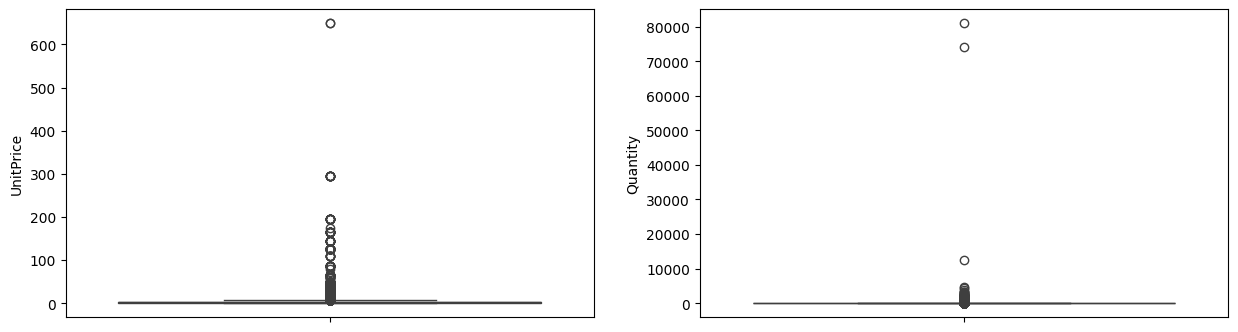

In [ ]:
df_preprocessed = data_preprocessing(df)

In [ ]:
df_preprocessed.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2.0,2011-11-29 13:04:00,1.95,16479.0,United Kingdom,Tuesday
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24.0,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,Sunday
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6.0,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,Monday
5,579668,23575,SNACK TRAY PAISLEY PARK,8.0,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,Wednesday
7,547684,23176,ABC TREASURE BOOK BOX,8.0,2011-03-24 14:46:00,2.25,12408.0,Belgium,Thursday


## Understanding new insights from the data (1 point)

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

In [ ]:
# YOUR CODE HERE

def understanding_new_insights(df):
  print('-------------------------------Understanding new insights from the data----------------------------------')

  # Are there any free items in the data? How many are there?
  count_free = (df.UnitPrice == 0.0).sum()
  print('Free items in the dataset : ', count_free)

  # Find the number of transactions per country and visualize using an appropriate plot
  plt.figure(figsize=(20,8))
  plt.title('Number of transactions per country')
  df.Country.value_counts().plot(kind='bar', log=True)

  # What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot
  repeat_customers = df.groupby('CustomerID').filter(lambda x: len(x) > 1)
  single_time_customers = df.groupby('CustomerID').filter(lambda x: len(x) == 1)
  n_repeat_customers = repeat_customers.CustomerID.nunique()
  n_single_customers = single_time_customers.CustomerID.nunique()
  n_customers = df.CustomerID.nunique()
  plt.figure(figsize=(5,5))
  plt.title('Repeat customers vs Single-time customers')
  plt.pie([n_repeat_customers, n_single_customers], labels=['Repeat Customers', 'Single Time Customers'], autopct='%1.1f%%', startangle=90)

  # Plot heatmap showing unit price per month and day of the week
  df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month_name()
  unit_price_month_day = df.pivot_table(index='Month', columns='DayOfWeek', values='UnitPrice', aggfunc='mean')
  plt.figure(figsize=(12,8))
  plt.title('Unit price per month and day of the week')
  sns.heatmap(unit_price_month_day, annot=True, cmap='coolwarm', cbar=True)
  plt.xlabel('Day of the Week')
  plt.ylabel('Month')
  plt.show()

  # Find the top 10 customers who bought the most no.of items.
  plt.figure(figsize=(10,5))
  plt.title('Top 10 customers who bought most no. of items')
  repeat_customers.CustomerID.value_counts().head(10).plot(kind='bar')

  # Find the top 10 Items bought by most no.of customers
  plt.figure(figsize=(10,5))
  plt.title('Top 10 Items bought by most no. of customers')
  df.Description.value_counts().head(10).plot(kind='bar')

-------------------------------Understanding new insights from the data----------------------------------
Free items in the dataset :  31


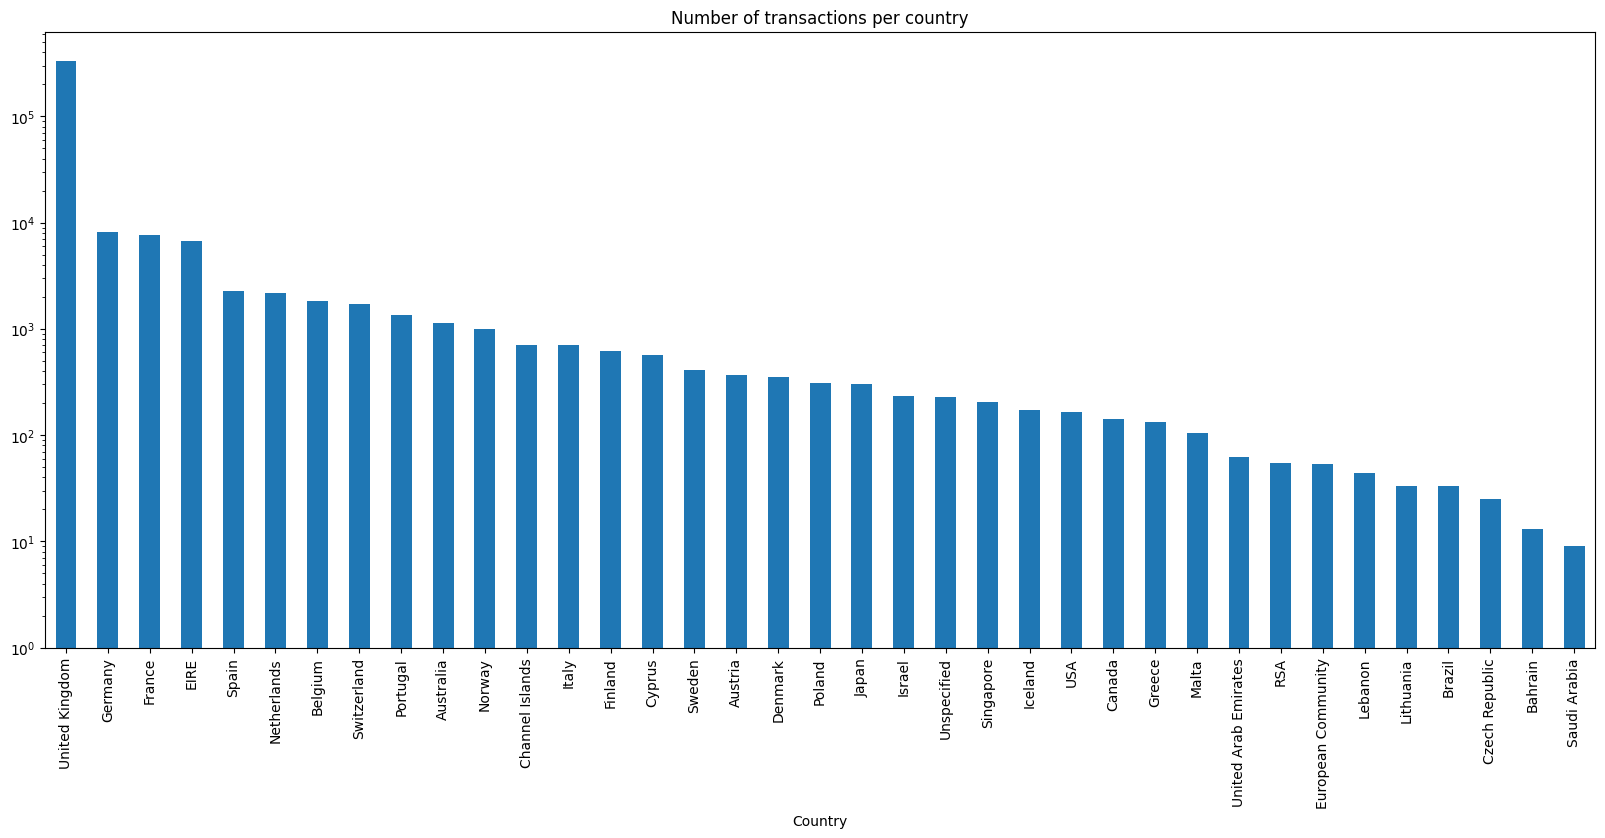

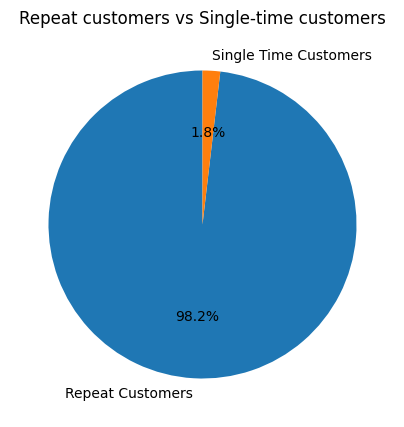

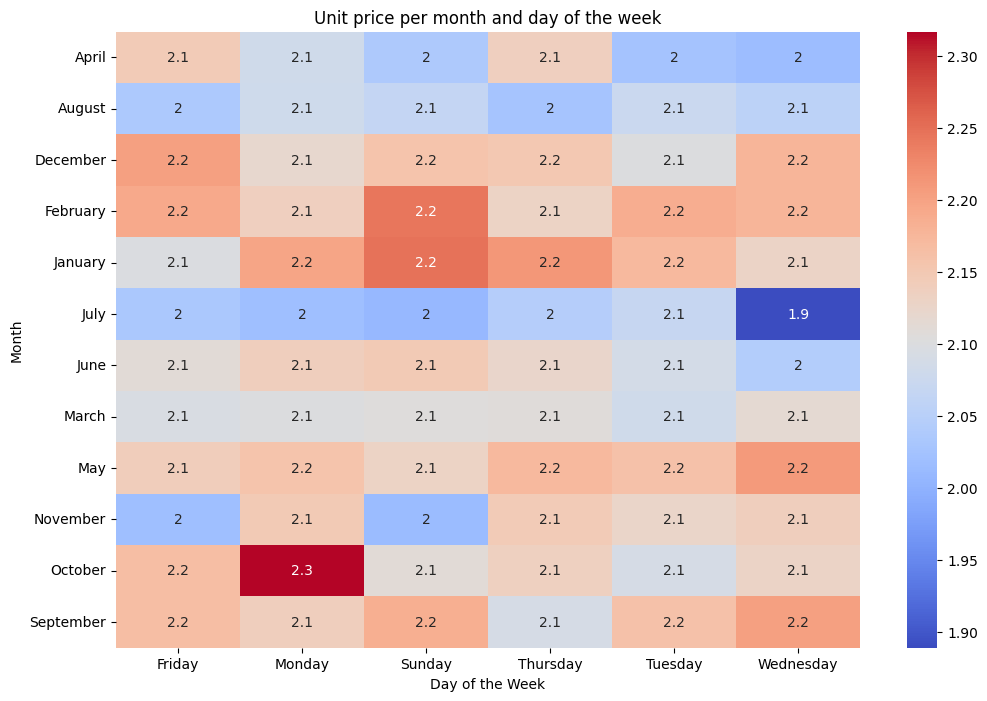

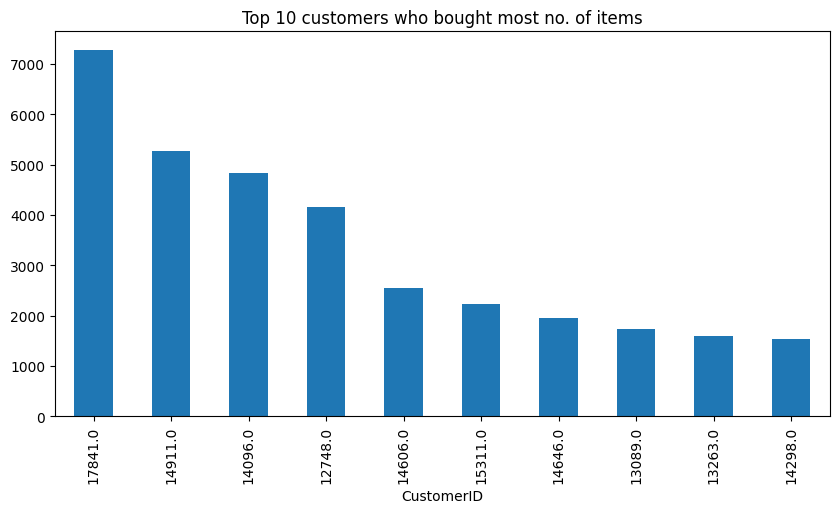

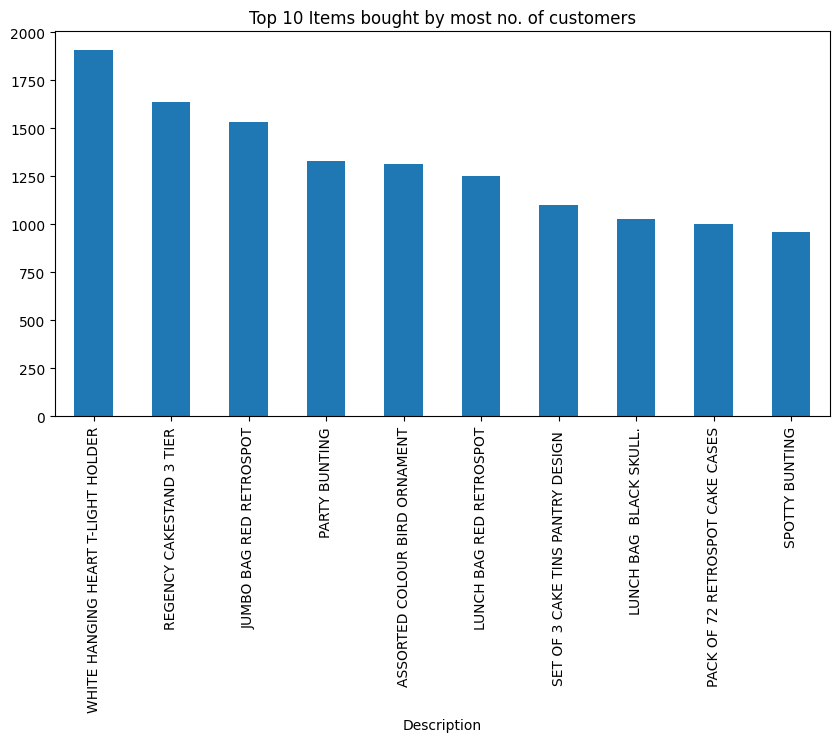

In [ ]:
understanding_new_insights(df_preprocessed)

## Feature Engineering and Transformation (2 points)

### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

In [ ]:
# YOUR CODE HERE
def create_new_features(df):
  print('-------------------------------Creating new features in dataset------------------------------------------')
  df['TotalAmount'] = df.Quantity * df.UnitPrice
  df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month
  df['Day'] = pd.to_datetime(df['InvoiceDate']).dt.day_of_week
  df['Hour'] = pd.to_datetime(df['InvoiceDate']).dt.hour
  print('Shape of dataset after creating new features :', df.shape)
  return df

def group_by_customer_id(df):
  print('-------------------------------Grouping by customer ID in dataset----------------------------------------')
  grouped_df = df.groupby('CustomerID').agg({
        'Quantity': 'sum',
        'TotalAmount': 'sum',
        'InvoiceNo': 'nunique',  # Number of unique transactions
        'Country': 'first',
        'Month': 'median',  # Median month
        'Day': 'median',  # Median day
        'Hour': 'median'  # Median hour
    }).reset_index()

  grouped_df.rename(columns={'Quantity': 'TotalQuantity', 'InvoiceNo': 'TotalTransactions'}, inplace=True)
  grouped_df.Month = grouped_df.Month.astype('int')
  grouped_df.Day = grouped_df.Day.astype('int')
  grouped_df.Hour = grouped_df.Hour.astype('int')
  print('Shape of dataset after grouping by customer ID :', grouped_df.shape)
  return grouped_df

def feature_engineering(df):
  print('-------------------------------Feature Engineering------------------------------------------------------')
  df = create_new_features(df)
  df = group_by_customer_id(df)
  return df

In [ ]:
df_grouped = feature_engineering(df_preprocessed)

-------------------------------Feature Engineering------------------------------------------------------
-------------------------------Creating new features in dataset------------------------------------------
Shape of dataset after creating new features : (371690, 13)
-------------------------------Grouping by customer ID in dataset----------------------------------------
Shape of dataset after grouping by customer ID : (4332, 8)


In [ ]:
df_grouped.head()

,CustomerID,TotalQuantity,TotalAmount,TotalTransactions,Country,Month,Day,Hour
0,12346.0,6.0,6.24,1,United Kingdom,1,1,10
1,12347.0,1872.0,3230.36,7,Iceland,8,1,12
2,12348.0,260.0,177.32,4,Finland,12,3,19
3,12349.0,550.0,1041.26,1,Italy,11,0,9
4,12350.0,196.0,294.40,1,Norway,2,2,16


In [ ]:
df_grouped.Month.nunique(), df_grouped.Day.nunique(), df_grouped.Hour.nunique()

(12, 7, 14)

### Scale the data

Apply `StandardScaler` on the features.

In [ ]:
# YOUR CODE HERE for scaling
df_for_clustering = df_grouped.drop(columns=['CustomerID', 'Country'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_for_clustering)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df_for_clustering.columns)
df_scaled.head()

,TotalQuantity,TotalAmount,TotalTransactions,Month,Day,Hour
0,-0.457753,-0.446750,-0.424581,-2.163107,-0.911390,-1.189443
1,0.971056,0.966428,0.363909,0.131033,-0.911390,-0.250717
2,-0.263263,-0.371763,-0.030336,1.441971,0.265403,3.034824
3,-0.041208,0.006914,-0.424581,1.114236,-1.499786,-1.658806
4,-0.312268,-0.320445,-0.424581,-1.835373,-0.322993,1.626735


## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

In [ ]:
# YOUR CODE HERE to apply KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_scaled)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [ ]:
centroids = kmeans.cluster_centers_
df_grouped['Cluster'] = kmeans.labels_

centroids_in_original_scale = scaler.inverse_transform(centroids)
print('Cluster centroids : ')
print(centroids_in_original_scale)

Cluster centroids : 
[[3.67811242e+02 5.98591904e+02 2.78271812e+00 8.88674497e+00
  4.19043624e+00 1.40704698e+01]
 [3.75668960e+02 6.35448226e+02 3.01299694e+00 3.95030581e+00
  2.21941896e+00 1.21490826e+01]
 [4.32019129e+02 7.12111286e+02 3.05540897e+00 9.74670185e+00
  1.56596306e+00 1.17163588e+01]
 [1.94873333e+04 3.43907211e+04 1.00000000e+02 8.11111111e+00
  2.00000000e+00 1.26666667e+01]
 [2.78697720e+03 4.91413055e+03 1.80390879e+01 7.54071661e+00
  2.44951140e+00 1.22442997e+01]]


#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

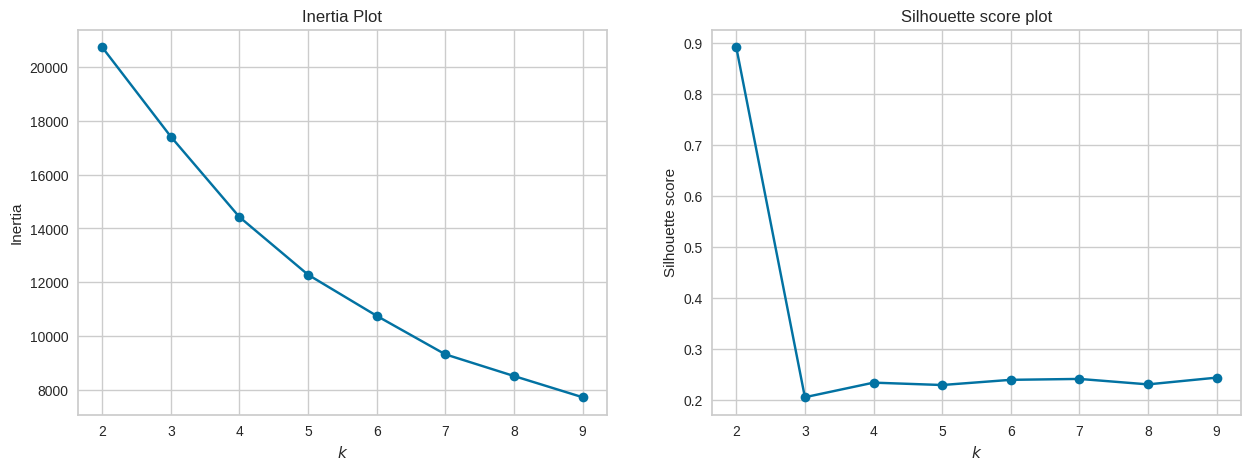

In [ ]:
# YOUR CODE HERE
# Plot inertia and Silhouette score by varying number of clusters
clusters = np.arange(2,10)
inertia = []
sil_score = []
for c in clusters:
    kmeans = KMeans(n_clusters = c, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    sil_score.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(clusters, inertia, marker= 'o')
plt.title('Inertia Plot')
plt.xlabel("$k$")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(clusters, sil_score, marker= 'o')
plt.title('Silhouette score plot')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")

plt.show()

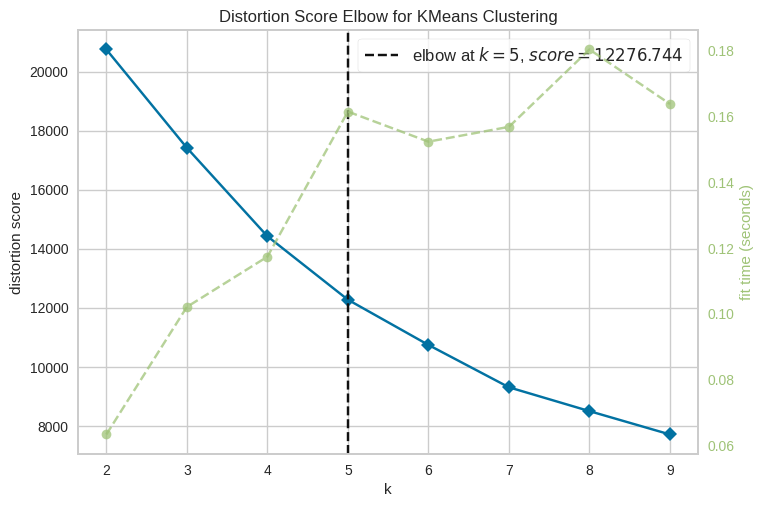

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='distortion')
visualizer.fit(df_scaled)
visualizer.show()

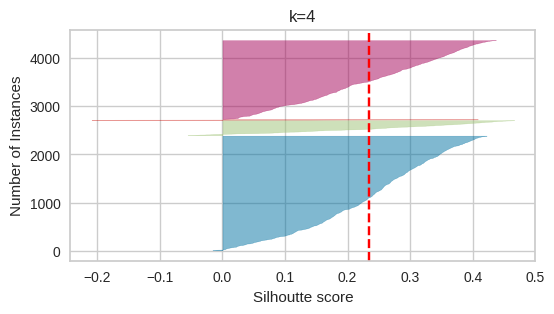

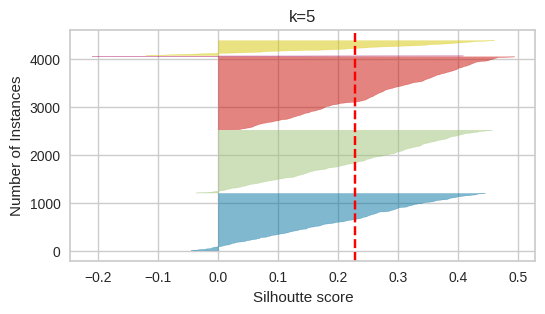

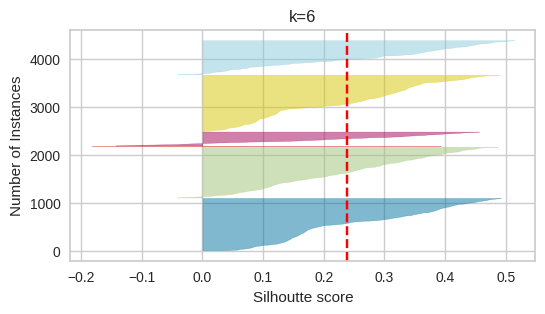

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
clusters = np.arange(4,7)
for c in clusters:
  plt.figure(figsize=(6, 3))
  kmeans = KMeans(n_clusters = c, init='k-means++', max_iter=300, n_init=10, random_state=0)
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(df_scaled)
  plt.title("k={}".format(c))
  plt.xlabel("Silhoutte score")
  plt.ylabel("Number of Instances")
  plt.show()

### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


In [ ]:
# YOUR CODE HERE
dbscan = DBSCAN(eps=0.585, min_samples=25)
dbscan.fit(df_scaled)
print("Unique clusters in data: ", np.unique(dbscan.labels_))
df_grouped['Cluster_DBSCAN'] = dbscan.labels_

Unique clusters in data:  [-1  0  1  2  3  4  5  6]


### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

In [ ]:
df_grouped['TotalAmount'] += 0.1 # For the purpose of log plot

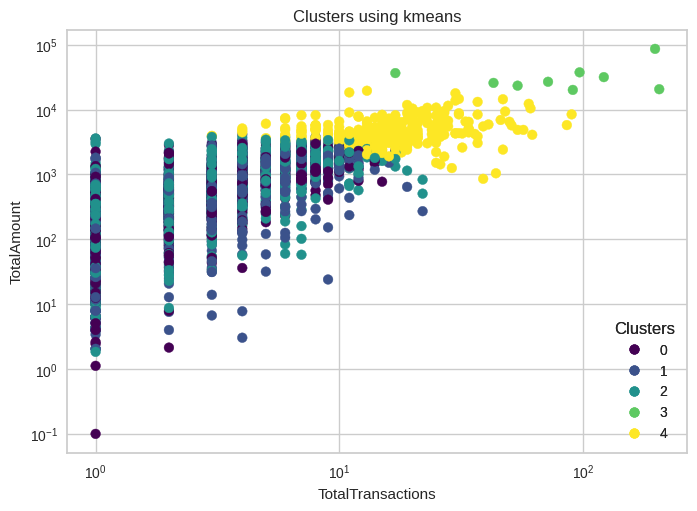

In [ ]:
# YOUR CODE HERE
fig, axs = plt.subplots()
scatter = axs.scatter(df_grouped.TotalTransactions, df_grouped.TotalAmount, c=df_grouped.Cluster, cmap='viridis')
plt.title('Clusters using kmeans')
plt.xlabel('TotalTransactions')
plt.ylabel('TotalAmount')
axs.set_yscale("log")
axs.set_xscale("log")
legend1 = axs.legend(*scatter.legend_elements(), title="Clusters")
axs.add_artist(legend1)
plt.show()

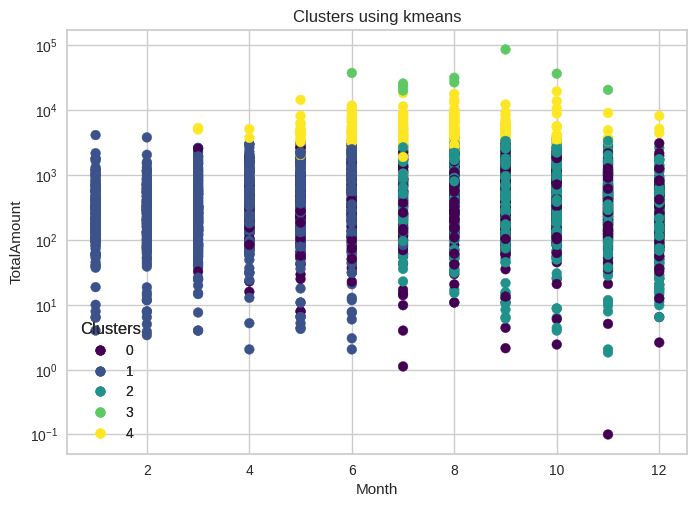

In [ ]:
fig, axs = plt.subplots()
scatter = axs.scatter(df_grouped.Month, df_grouped.TotalAmount, c=df_grouped.Cluster, cmap='viridis')
plt.title('Clusters using kmeans')
plt.xlabel('Month')
plt.ylabel('TotalAmount')
axs.set_yscale("log")
legend1 = axs.legend(*scatter.legend_elements(), title="Clusters")
axs.add_artist(legend1)
plt.show()

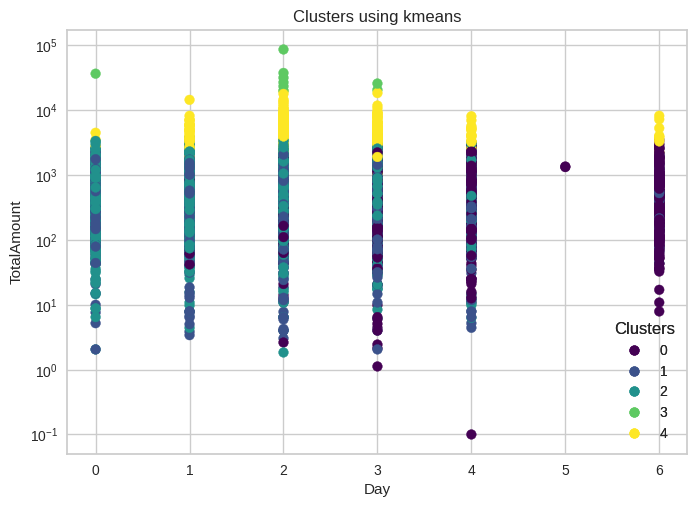

In [ ]:
fig, axs = plt.subplots()
scatter = axs.scatter(df_grouped.Day, df_grouped.TotalAmount, c=df_grouped.Cluster, cmap='viridis')
plt.title('Clusters using kmeans')
plt.xlabel('Day')
plt.ylabel('TotalAmount')
axs.set_yscale("log")
legend1 = axs.legend(*scatter.legend_elements(), title="Clusters")
axs.add_artist(legend1)
plt.show()

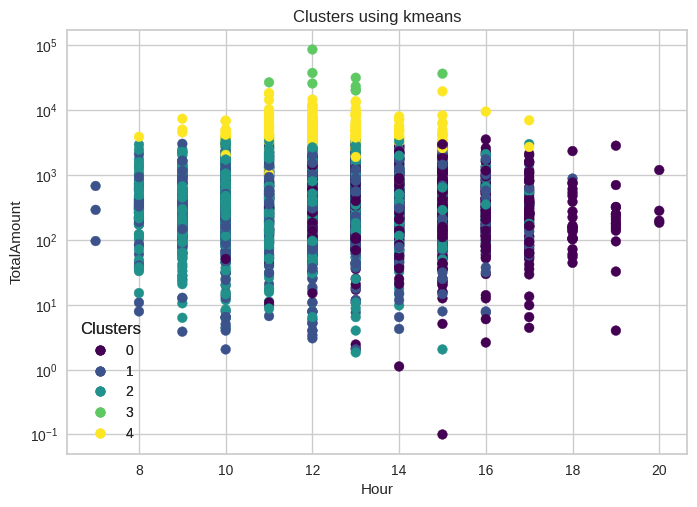

In [ ]:
fig, axs = plt.subplots()
scatter = axs.scatter(df_grouped.Hour, df_grouped.TotalAmount, c=df_grouped.Cluster, cmap='viridis')
plt.title('Clusters using kmeans')
plt.xlabel('Hour')
plt.ylabel('TotalAmount')
axs.set_yscale("log")
legend1 = axs.legend(*scatter.legend_elements(), title="Clusters")
axs.add_artist(legend1)
plt.show()

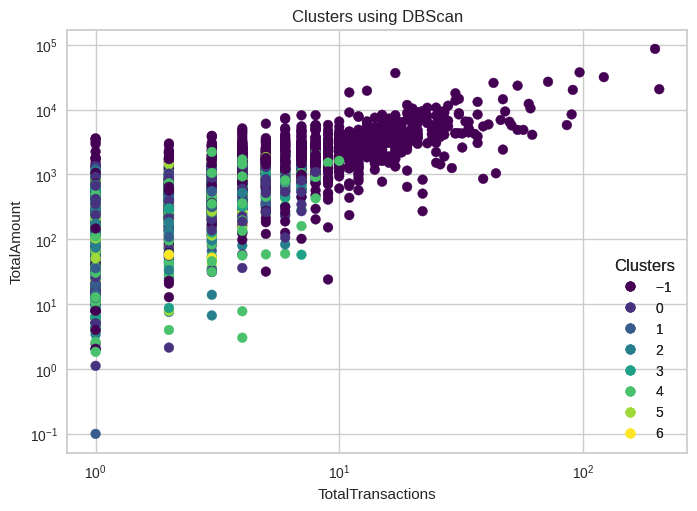

In [ ]:
fig, axs = plt.subplots()
scatter = axs.scatter(df_grouped.TotalTransactions, df_grouped.TotalAmount, c=df_grouped.Cluster_DBSCAN, cmap='viridis')
plt.title('Clusters using DBScan')
plt.xlabel('TotalTransactions')
plt.ylabel('TotalAmount')
axs.set_yscale("log")
axs.set_xscale("log")
legend1 = axs.legend(*scatter.legend_elements(), title="Clusters")
axs.add_artist(legend1)
plt.show()

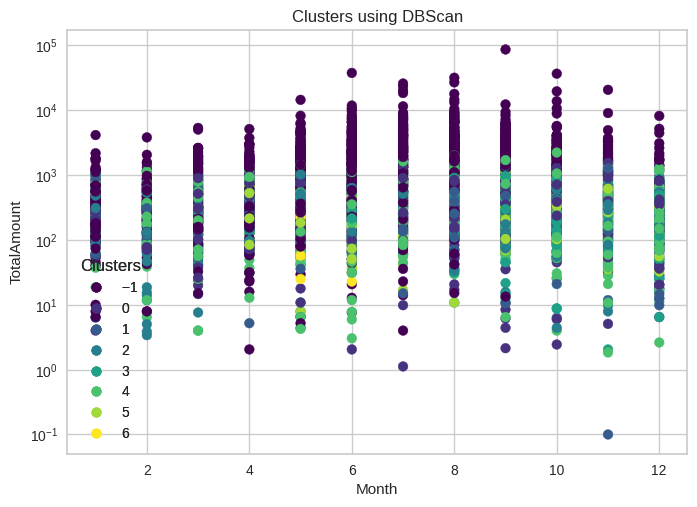

In [ ]:
fig, axs = plt.subplots()
scatter = axs.scatter(df_grouped.Month, df_grouped.TotalAmount, c=df_grouped.Cluster_DBSCAN, cmap='viridis')
plt.title('Clusters using DBScan')
plt.xlabel('Month')
plt.ylabel('TotalAmount')
axs.set_yscale("log")
legend1 = axs.legend(*scatter.legend_elements(), title="Clusters")
axs.add_artist(legend1)
plt.show()

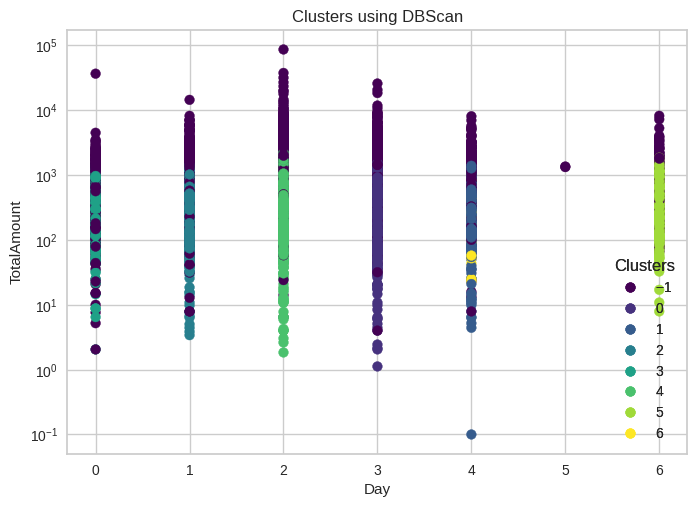

In [ ]:
fig, axs = plt.subplots()
scatter = axs.scatter(df_grouped.Day, df_grouped.TotalAmount, c=df_grouped.Cluster_DBSCAN, cmap='viridis')
plt.title('Clusters using DBScan')
plt.xlabel('Day')
plt.ylabel('TotalAmount')
axs.set_yscale("log")
legend1 = axs.legend(*scatter.legend_elements(), title="Clusters")
axs.add_artist(legend1)
plt.show()

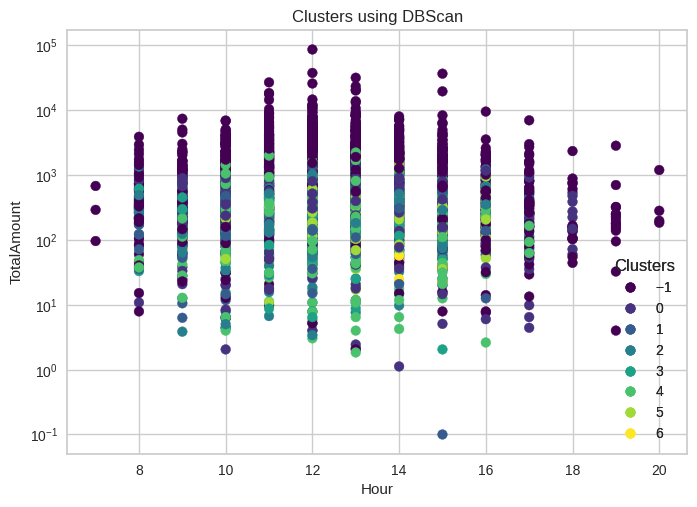

In [ ]:
fig, axs = plt.subplots()
scatter = axs.scatter(df_grouped.Hour, df_grouped.TotalAmount, c=df_grouped.Cluster_DBSCAN, cmap='viridis')
plt.title('Clusters using DBScan')
plt.xlabel('Hour')
plt.ylabel('TotalAmount')
axs.set_yscale("log")
legend1 = axs.legend(*scatter.legend_elements(), title="Clusters")
axs.add_artist(legend1)
plt.show()

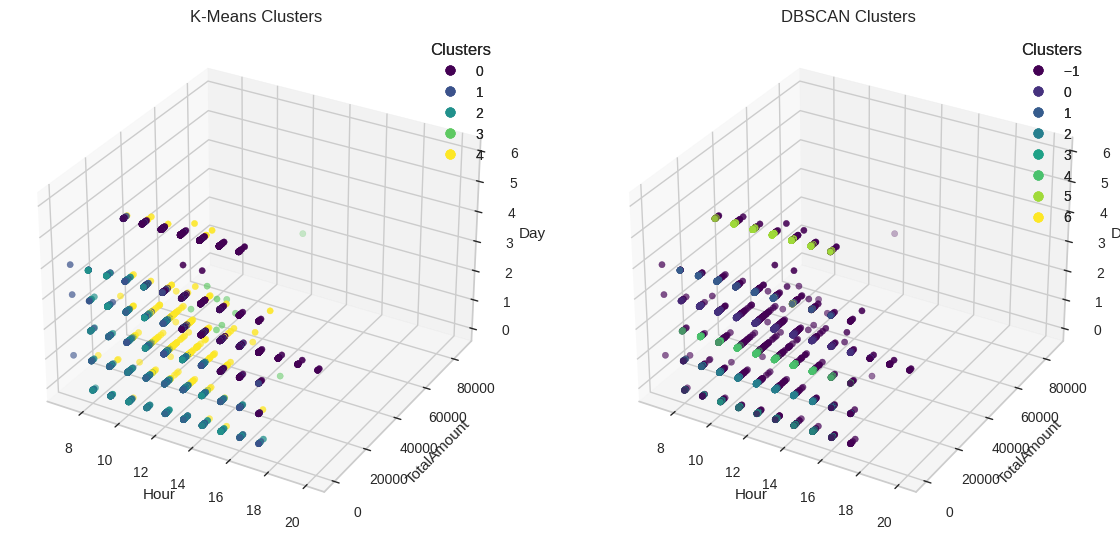

In [ ]:
# Visualize K-Means clusters in 3D
fig = plt.figure(figsize=(14, 7))

ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter(df_grouped['Hour'], df_grouped['TotalAmount'], df_grouped['Day'],
                     c=df_grouped['Cluster'], cmap='viridis')
ax.set_title('K-Means Clusters')
ax.set_xlabel('Hour')
ax.set_ylabel('TotalAmount')
ax.set_zlabel('Day')
#ax.set_zscale("log")
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Visualize DBSCAN clusters in 3D
ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter(df_grouped['Hour'], df_grouped['TotalAmount'], df_grouped['Day'],
                     c=df_grouped['Cluster_DBSCAN'], cmap='viridis')
ax.set_title('DBSCAN Clusters')
ax.set_xlabel('Hour')
ax.set_ylabel('TotalAmount')
ax.set_zlabel('Day')
legend2 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend2)

plt.show()

### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels
  
  **Hint**: [`kmeans.labels_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
)
* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data

In [ ]:
# YOUR CODE HERE
X = df_grouped[['TotalQuantity', 'TotalAmount', 'TotalTransactions', 'Country', 'Hour', 'Day', 'Month']]
y = df_grouped.Cluster
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
!pip -qq install catboost

In [ ]:
from catboost import CatBoostClassifier, metrics
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, cat_features=['Country'])
catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, classification_report
y_train_pred_catboost = catboost_model.predict(X_train)
y_test_pred_catboost = catboost_model.predict(X_val)

# Print performance metrics for training set
print("Training Set Performance:")
print("Accuracy:", accuracy_score(y_train, y_train_pred_catboost))
print("Classification Report:")
print(classification_report(y_train, y_train_pred_catboost))

# Print performance metrics for test set
print("Test Set Performance:")
print("Accuracy:", accuracy_score(y_val, y_test_pred_catboost))
print("Classification Report:")
print(classification_report(y_val, y_test_pred_catboost))

Training Set Performance:
Accuracy: 0.984992784992785
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       949
           1       0.98      0.99      0.99      1050
           2       0.98      0.99      0.98      1218
           3       1.00      1.00      1.00         9
           4       1.00      0.97      0.99       239

    accuracy                           0.98      3465
   macro avg       0.99      0.99      0.99      3465
weighted avg       0.99      0.98      0.98      3465

Test Set Performance:
Accuracy: 0.9780853517877739
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       242
           1       0.97      0.98      0.98       257
           2       0.97      0.98      0.98       300
           4       0.99      0.97      0.98        68

    accuracy                           0.98       867
   macro avg       0.98      0.98 

### Evaluation of Test Data
* Use the model to predict the labels for the Test data below
* Format the test data in the same format as the train data.
* Predict it with trained supervised ML model

In [ ]:
# Test set provided as below
test = pd.read_csv("Online_Retail_Test.csv")
test.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom


In [ ]:
test.shape

(27096, 8)

-------------------------------Data Preprocessing------------------------------------------------------
-------------------------------Removing null values in dataset------------------------------------------
Null values in dataset : 
 InvoiceNo         0
StockCode         0
Description      69
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     6817
Country           0
dtype: int64
Null values in dataset after removing : 
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
Shape of dataset after removing null values : (20279, 8)
-------------------------------Removing irrelevant transactions in dataset--------------------------------
Irrelevant transactions in dataset : 116
Shape of dataset after removing irrelevant transactions : (20163, 8)
-------------------------------Removing duplicate entries in dataset--------------------------------
Duplicate entries in data

,CustomerID,TotalQuantity,TotalAmount,TotalTransactions,Country,Month,Day,Hour
0,12347.0,106.0,218.20,6,Iceland,10,2,14
1,12348.0,6.0,1.74,1,Finland,1,1,10
2,12349.0,20.0,41.14,1,Italy,11,0,9
3,12353.0,6.0,11.70,1,Bahrain,5,3,17
4,12354.0,13.0,14.35,1,Spain,4,3,13


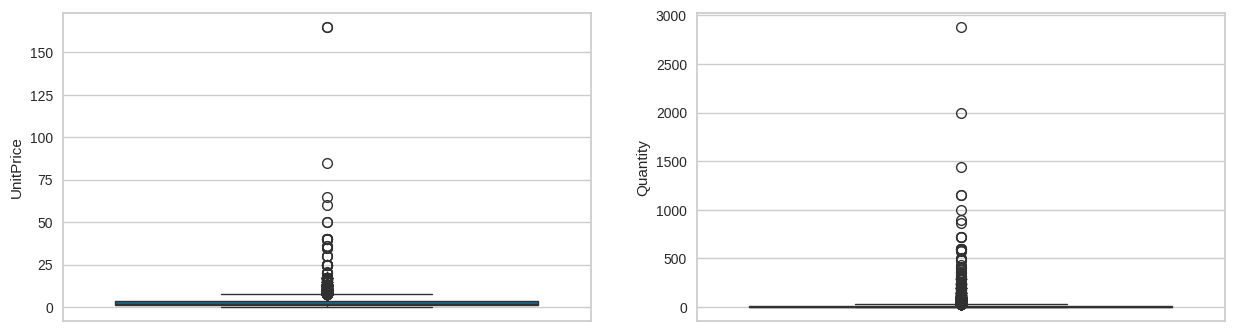

In [ ]:
# YOUR CODE HERE
test_preprocessed = data_preprocessing(test)
test_feature_engineering = feature_engineering(test_preprocessed)
test_feature_engineering.head()

In [ ]:
test_predict_catboost = catboost_model.predict(test_feature_engineering[['TotalQuantity', 'TotalAmount', 'TotalTransactions', 'Country', 'Hour', 'Day', 'Month']])

### Report Analysis

- Discuss the pros and cons of removing the missing values vs replacing with the mean values
- Based on the visualization of clusters, comment on the difference in buying patterns of each cluster
- What other methods could be used to determine the optimal no. of clusters?